# Timelapse Nanog

In [1]:
%pip uninstall basicpy -yq
%pip install basicpy matplotlib

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.910704423215066e-07.
INFO:basicpy.basicpy:mean of S: 1.0000001192092896.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 8.4499544072969e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.003375018248334527
INFO:basicpy.basicpy:elapsed time: 8.008315445971675 seconds
INFO:basicpy.basicpy:Reweighting converged.
INFO:basicpy.basicpy:=== BaSiC fit finished in 8.271574027021416 seconds ===


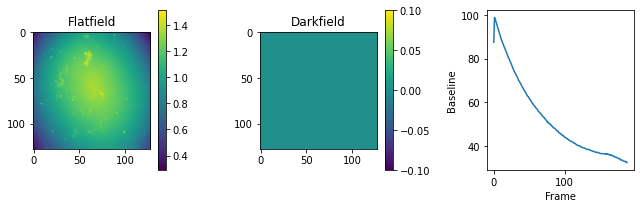

In [1]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt
import numpy as np

images = bdata.timelapse_nanog()
basic = BaSiC(lambda_flatfield_coef=0.001)
basic.fit(images)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()


INFO:basicpy.basicpy:Initializing BaSiC 5058299712 with parameters: 
lambda_flatfield_coef: 0.35

INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.948607614911452e-07.
INFO:basicpy.basicpy:mean of S: 1.000000238418579.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 8.588989999225305e-07.
INFO:basicpy.basicpy:mean of S: 0.9999999403953552.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.0034123645164072514
INFO:basicpy.basicpy:elapsed time: 4.978623581002466 seconds
INFO:basicpy.basicpy:Reweighting converged.
INFO:basicpy.basicpy:=== BaSiC fit finished in 4.988699424022343 seconds ===


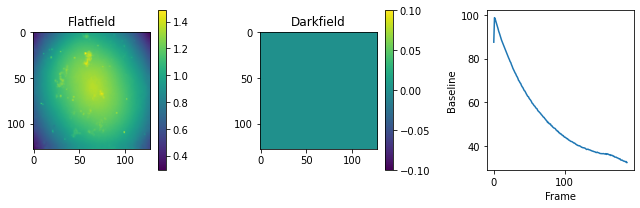

In [2]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images = bdata.timelapse_nanog()
basic = BaSiC(lambda_flatfield_coef=0.35)
basic.fit(images)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()


In [3]:
images_transformed = basic.transform(images, timelapse=True)


INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0


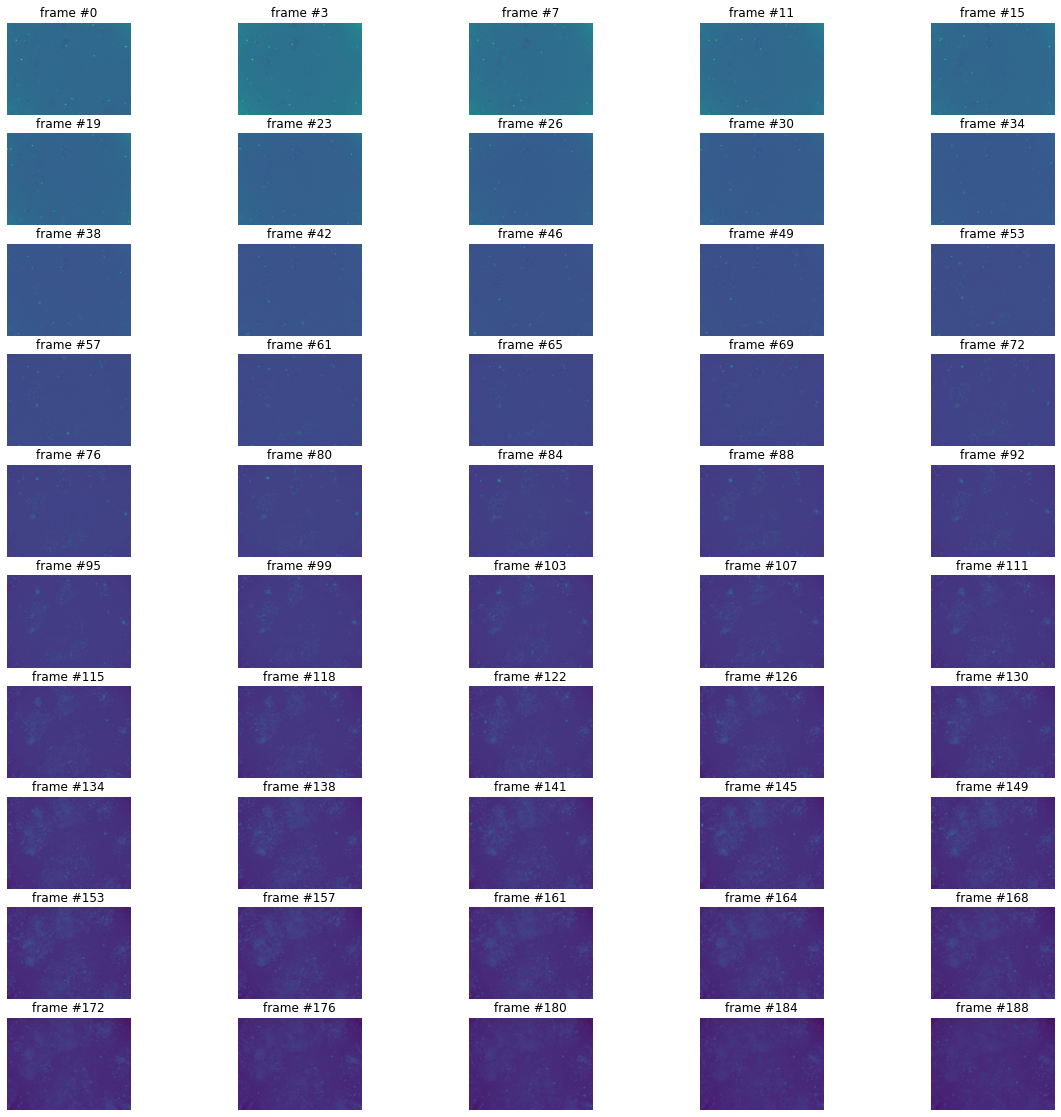

In [ ]:
im = images_transformed

nframes = 50
ncols = 5
fig, axs = plt.subplots(np.ceil(nframes / ncols).astype(int), ncols, figsize=(20, 20))
frame_indices = np.floor(np.linspace(0, im.shape[0] - 1, 50)).astype(int)

vmin, vmax = 0, 255

for i, frame_index in enumerate(frame_indices):
    ax = axs.ravel()[i]
    ax.imshow(im[frame_index], vmin=vmin, vmax=vmax)
    ax.set_title(f"frame #{frame_index}")
    ax.axis("off")
